In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd
import scipy.io as sio
import os

In [2]:
np.random.seed(813306)

In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
# nb_epochs = 5000
# nb_epochs = 200
nb_epochs = 300

In [4]:
# 导入训练集
# train_path = r"F:\zwy\20200429期末考试数据集\dataset\train"
train_path = r"D:\研一下\临时文件\20200429期末考试数据集\dataset\train"
label_files= os.listdir(train_path) #得到文件夹下的所有文件名称
print(label_files)
#def load_train():
train = []
print('Read train datasets')
for j in label_files:   
    path = os.path.join(train_path,str(j))
    print(path)
    txt_files = os.listdir(path)  
    for fl in txt_files:
        txt_path = os.path.join(path,str(fl))
        print(txt_path)
        train.append(int(j[5:]))   
        file_object = open(txt_path,'rU')
        try:
            for line in file_object: 
                line=line.replace("\\n", ",")
                line=line.split(",")
                for num in line:
                    train.append(float(num))
        finally:
            file_object.close()                 
train = np.array(train)
train = train.reshape(-1,601)
np.random.shuffle(train)
print(train.shape)
print(train)

['label1', 'label10', 'label11', 'label12', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9']
Read train datasets
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_013.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\trai

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 'U' mode is deprecated



D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_051.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_052.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_053.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_054.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_055.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_056.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_057.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_058.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_059.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_060.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_061.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_062.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_063.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_064.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_065.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_066.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label1\1_067.

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_078.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_079.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_080.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_081.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_082.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_083.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_084.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_085.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_086.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_087.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_088.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_089.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_090.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_091.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_092.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label10\10_093.txt
D:\研一下\临时文件\20200429期末考试

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_015.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_016.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_017.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_018.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_019.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_020.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_021.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_022.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_023.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_024.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_025.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_026.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_027.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_028.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_029.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label12\12_030.txt
D:\研一下\临时文件\20200429期末考试

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_081.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_082.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_083.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_084.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_085.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_086.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_087.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_088.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_089.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_090.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_091.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_092.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_093.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_094.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_095.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label2\2_096.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label3
D:\研一下\

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_013.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_014.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_015.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_016.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_017.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label5\5_018.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_088.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_089.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_090.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_091.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_092.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_093.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_094.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_095.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_096.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_097.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_098.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label6\6_099.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label7\7_004.txt
D:\研一下\

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_022.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_023.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_024.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_025.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_026.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_027.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_028.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_029.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_030.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_031.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_032.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_033.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_034.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_035.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_036.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_037.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label8\8_038.t

D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_075.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_076.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_077.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_078.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_079.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_080.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_081.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_082.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_083.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_084.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_085.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_086.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_087.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_088.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_089.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_090.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\train\label9\9_091.t

In [5]:
# 导入验证集
# test_path = r"F:\zwy\20200429期末考试数据集\dataset\val"
test_path = r"D:\研一下\临时文件\20200429期末考试数据集\dataset\val"
label_files= os.listdir(test_path) #得到文件夹下的所有文件名称
print(label_files)
#def load_train():
test = []
print('Read val datasets')
for j in label_files:   
    path = os.path.join(test_path,str(j))
    print(path)
    txt_files = os.listdir(path)  
    for fl in txt_files:
        txt_path = os.path.join(path,str(fl))
        print(txt_path)
        test.append(int(j[5:]))   
        file_object = open(txt_path,'rU')
        try:
            for line in file_object: 
                line=line.replace("\\n", ",")
                line=line.split(",")
                for num in line:
                    test.append(float(num))
        finally:
            file_object.close()                 
test = np.array(test)
test = test.reshape(-1,601)
np.random.shuffle(test)
total=np.append(train,test)
total= total.reshape(-1,601)
x_total=total[:,1:]
print(test.shape)
print(test)

['label1', 'label10', 'label11', 'label12', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9']
Read val datasets
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label1\1_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label10\10_004.txt
D:\研一下\临时文件\20

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 'U' mode is deprecated



D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_009.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_010.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_011.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label4\4_012.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_001.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_002.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_003.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_004.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_005.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_006.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_007.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\label5\5_008.txt
D:\研一下\临时文件\20200429期末考试数据集\dataset\val\

In [6]:
# 数据预处理
y_train,x_train = train[:,0],train[:,1:]
y_test,x_test = test[:,0],test[:,1:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

nb_classes = len(np.unique(y_train))
batch_size = min(x_train.shape[0]/10, 16)

print(y_test)
print(nb_classes)

y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)   # y归一化  0，nb_classes-1
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

Y_train = keras.utils.to_categorical(y_train, nb_classes)   # 转为one-hot形式
Y_test = keras.utils.to_categorical(y_test, nb_classes)

# x进行归一化
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_train_mean)/(x_train_std)
print(x_train.shape)
print(y_train)

(1198, 600) (1198,)
(100, 600) (100,)
[ 9. 12. 12. 12.  2.  4.  3.  1.  4.  7.  6. 12.  1.  2. 10.  4.  7.  1.
  7.  5. 12.  4.  7.  3.  3.  2.  5.  8.  7.  5.  5.  9.  9.  6.  4.  4.
  8.  4.  6.  6.  2.  5.  9.  3.  6. 11. 12.  9.  1.  3.  5. 10.  3.  2.
  2.  4.  5.  3.  9.  9.  2.  7.  1.  2.  7. 11.  8.  3.  6. 10. 10.  1.
  6. 10.  2.  3. 11. 12.  1.  2.  1. 10.  2.  5.  4. 10.  4.  4.  3.  3.
  2.  3. 12.  7.  4.  9.  7. 12.  5.  1.]
12
(1198, 600)
[10.  7.  4. ...  1.  8.  4.]


In [29]:
x = keras.layers.Input(x_train.shape[1:])
y= keras.layers.Dropout(0.1)(x)
y = keras.layers.Dense(500, activation='relu')(y)
y = keras.layers.Dropout(0.2)(y)
y = keras.layers.Dense(500, activation='relu')(y)
y = keras.layers.Dropout(0.2)(y)
y = keras.layers.Dense(500, activation = 'relu')(y)
y = keras.layers.Dropout(0.3)(y)
out = keras.layers.Dense(nb_classes, activation='softmax')(y)

model = keras.models.Model(inputs=x, outputs=out)

optimizer = keras.optimizers.Adadelta()    
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=200, min_lr=0.1)

hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
                 verbose=1, validation_data=(x_test, Y_test))

#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'])
# 保存模型
model.save('MLP_exam.h5')

Train on 1198 samples, validate on 100 samples
Epoch 1/300
1198/1198 [==============================] - 9s 7ms/sample - loss: 2.8561 - accuracy: 0.0885 - val_loss: 2.5382 - val_accuracy: 0.0900
Epoch 2/300
1198/1198 [==============================] - 3s 2ms/sample - loss: 2.8246 - accuracy: 0.0927 - val_loss: 2.4904 - val_accuracy: 0.0900
Epoch 3/300
1198/1198 [==============================] - 3s 2ms/sample - loss: 2.7550 - accuracy: 0.0977 - val_loss: 2.4493 - val_accuracy: 0.0900
Epoch 4/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 2.7202 - accuracy: 0.1035 - val_loss: 2.4118 - val_accuracy: 0.0900
Epoch 5/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 2.6491 - accuracy: 0.1110 - val_loss: 2.3768 - val_accuracy: 0.1100
Epoch 6/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 2.6154 - accuracy: 0.1135 - val_loss: 2.3433 - val_accuracy: 0.1100
Epoch 7/300
1198/1198 [==============================] - 3s 2ms/sample 

1198/1198 [==============================] - 2s 2ms/sample - loss: 1.0405 - accuracy: 0.7212 - val_loss: 0.7655 - val_accuracy: 0.7900
Epoch 111/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 1.0197 - accuracy: 0.7295 - val_loss: 0.7589 - val_accuracy: 0.7900
Epoch 112/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 1.0263 - accuracy: 0.7053 - val_loss: 0.7524 - val_accuracy: 0.7900
Epoch 113/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 1.0150 - accuracy: 0.7179 - val_loss: 0.7457 - val_accuracy: 0.7900
Epoch 114/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.9996 - accuracy: 0.7421 - val_loss: 0.7394 - val_accuracy: 0.7900
Epoch 115/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.9738 - accuracy: 0.7354 - val_loss: 0.7333 - val_accuracy: 0.7900
Epoch 116/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.9742 - accuracy: 0.7304 - val_loss: 0

1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7322 - accuracy: 0.7922 - val_loss: 0.5299 - val_accuracy: 0.8300
Epoch 166/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7491 - accuracy: 0.7905 - val_loss: 0.5272 - val_accuracy: 0.8300
Epoch 167/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7374 - accuracy: 0.7855 - val_loss: 0.5246 - val_accuracy: 0.8300
Epoch 168/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7327 - accuracy: 0.7871 - val_loss: 0.5221 - val_accuracy: 0.8300
Epoch 169/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7153 - accuracy: 0.7930 - val_loss: 0.5194 - val_accuracy: 0.8300
Epoch 170/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7230 - accuracy: 0.7947 - val_loss: 0.5167 - val_accuracy: 0.8300
Epoch 171/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.7414 - accuracy: 0.7738 - val_loss: 0

1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5916 - accuracy: 0.8222 - val_loss: 0.4203 - val_accuracy: 0.8500
Epoch 221/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5977 - accuracy: 0.8155 - val_loss: 0.4184 - val_accuracy: 0.8600
Epoch 222/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5890 - accuracy: 0.8239 - val_loss: 0.4169 - val_accuracy: 0.8600
Epoch 223/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5919 - accuracy: 0.8239 - val_loss: 0.4153 - val_accuracy: 0.8600
Epoch 224/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5945 - accuracy: 0.8214 - val_loss: 0.4138 - val_accuracy: 0.8600
Epoch 225/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5769 - accuracy: 0.8189 - val_loss: 0.4122 - val_accuracy: 0.8500
Epoch 226/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5754 - accuracy: 0.8372 - val_loss: 0

Epoch 275/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5107 - accuracy: 0.8422 - val_loss: 0.3505 - val_accuracy: 0.9000
Epoch 276/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5154 - accuracy: 0.8439 - val_loss: 0.3493 - val_accuracy: 0.9000
Epoch 277/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5136 - accuracy: 0.8497 - val_loss: 0.3482 - val_accuracy: 0.9000
Epoch 278/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4982 - accuracy: 0.8481 - val_loss: 0.3470 - val_accuracy: 0.9000
Epoch 279/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4994 - accuracy: 0.8406 - val_loss: 0.3459 - val_accuracy: 0.9000
Epoch 280/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.5144 - accuracy: 0.8447 - val_loss: 0.3450 - val_accuracy: 0.9000
Epoch 281/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4728 - accuracy: 0.8497

         loss  accuracy  val_loss  val_accuracy
0    0.437516  0.873957  0.324302          0.90
1    0.481545  0.858932  0.323061          0.90
2    0.481266  0.850584  0.322128          0.90
3    0.446040  0.863940  0.321276          0.90
4    0.481696  0.848915  0.320208          0.90
..        ...       ...       ...           ...
295  0.250059  0.915693  0.174254          0.93
296  0.248164  0.923205  0.173923          0.93
297  0.250372  0.923205  0.173524          0.93
298  0.257836  0.923205  0.173562          0.93
299  0.257672  0.918197  0.173243          0.93

[300 rows x 4 columns]
range(0, 300)
0      0.873957
1      0.858932
2      0.850584
3      0.863940
4      0.848915
         ...   
295    0.915693
296    0.923205
297    0.923205
298    0.923205
299    0.918197
Name: accuracy, Length: 300, dtype: float64


Text(0, 0.5, 'accuracy')

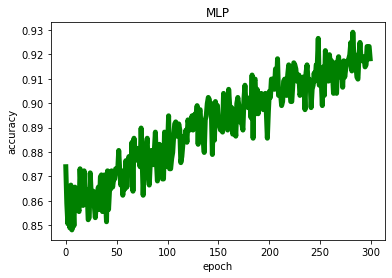

In [90]:
print(log)
loss = log['accuracy']
print(range(len(loss)))
print(loss)
plt.plot(range(len(loss)),loss,'-g',linewidth=5)
plt.title('MLP')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [72]:
model=keras.models.load_model('MLP_exam.h5')

optimizer = keras.optimizers.Adadelta()    
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=200, min_lr=0.1)

hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
                 verbose=1, validation_data=(x_test, Y_test))

#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'])
# 保存模型
model.save('MLP_exam1.h5')

Train on 1198 samples, validate on 100 samples
Epoch 1/300
1198/1198 [==============================] - 4s 3ms/sample - loss: 0.4375 - accuracy: 0.8740 - val_loss: 0.3243 - val_accuracy: 0.9000
Epoch 2/300
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.4815 - accuracy: 0.8589 - val_loss: 0.3231 - val_accuracy: 0.9000
Epoch 3/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4813 - accuracy: 0.8506 - val_loss: 0.3221 - val_accuracy: 0.9000
Epoch 4/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4460 - accuracy: 0.8639 - val_loss: 0.3213 - val_accuracy: 0.9000
Epoch 5/300
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.4817 - accuracy: 0.8489 - val_loss: 0.3202 - val_accuracy: 0.9000
Epoch 6/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.4458 - accuracy: 0.8664 - val_loss: 0.3195 - val_accuracy: 0.9000
Epoch 7/300
1198/1198 [==============================] - 2s 2ms/sample 

1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3604 - accuracy: 0.8865 - val_loss: 0.2474 - val_accuracy: 0.9100
Epoch 111/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3534 - accuracy: 0.8890 - val_loss: 0.2469 - val_accuracy: 0.9100
Epoch 112/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3441 - accuracy: 0.8915 - val_loss: 0.2463 - val_accuracy: 0.9100
Epoch 113/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3695 - accuracy: 0.8890 - val_loss: 0.2457 - val_accuracy: 0.9100
Epoch 114/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3746 - accuracy: 0.8756 - val_loss: 0.2450 - val_accuracy: 0.9100
Epoch 115/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3668 - accuracy: 0.8781 - val_loss: 0.2444 - val_accuracy: 0.9100
Epoch 116/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3774 - accuracy: 0.8831 - val_loss: 0

Epoch 165/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3586 - accuracy: 0.8873 - val_loss: 0.2210 - val_accuracy: 0.9200
Epoch 166/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3319 - accuracy: 0.8957 - val_loss: 0.2203 - val_accuracy: 0.9200
Epoch 167/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3308 - accuracy: 0.8915 - val_loss: 0.2198 - val_accuracy: 0.9200
Epoch 168/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3380 - accuracy: 0.8865 - val_loss: 0.2194 - val_accuracy: 0.9200
Epoch 169/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3310 - accuracy: 0.8998 - val_loss: 0.2192 - val_accuracy: 0.9200
Epoch 170/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3199 - accuracy: 0.9023 - val_loss: 0.2188 - val_accuracy: 0.9200
Epoch 171/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3296 - accuracy: 0.8990

Epoch 220/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2797 - accuracy: 0.9157 - val_loss: 0.1982 - val_accuracy: 0.9300
Epoch 221/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.3073 - accuracy: 0.9065 - val_loss: 0.1976 - val_accuracy: 0.9300
Epoch 222/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2996 - accuracy: 0.9007 - val_loss: 0.1975 - val_accuracy: 0.9300
Epoch 223/300
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.3108 - accuracy: 0.9007 - val_loss: 0.1971 - val_accuracy: 0.9300 ETA: 0s - los
Epoch 224/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2888 - accuracy: 0.9073 - val_loss: 0.1968 - val_accuracy: 0.9300
Epoch 225/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2969 - accuracy: 0.9165 - val_loss: 0.1965 - val_accuracy: 0.9300
Epoch 226/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2917 - ac

Epoch 275/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2829 - accuracy: 0.9107 - val_loss: 0.1803 - val_accuracy: 0.9300
Epoch 276/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2725 - accuracy: 0.9140 - val_loss: 0.1798 - val_accuracy: 0.9300
Epoch 277/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2655 - accuracy: 0.9157 - val_loss: 0.1794 - val_accuracy: 0.9300
Epoch 278/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2783 - accuracy: 0.9174 - val_loss: 0.1794 - val_accuracy: 0.9300
Epoch 279/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2735 - accuracy: 0.9182 - val_loss: 0.1793 - val_accuracy: 0.9300
Epoch 280/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2573 - accuracy: 0.9199 - val_loss: 0.1788 - val_accuracy: 0.9300
Epoch 281/300
1198/1198 [==============================] - 2s 2ms/sample - loss: 0.2668 - accuracy: 0.9249

加载测试集
(1298, 200)
(1298, 200)
(1298, 200)
Read train datasets


D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 'U' mode is deprecated


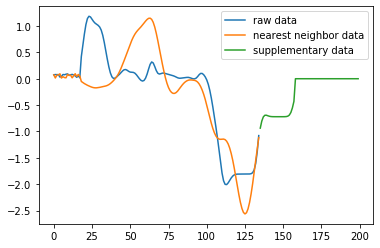

D:\Python\Anaconda3-5.0.1-Windows-x86_64\envs\tf2\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 'U' mode is deprecated


(300, 600)
[0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280

In [11]:
print('加载测试集')
import matplotlib.pyplot as plt
x_total1 = x_total[:, 0:200]
x_total2 = x_total[:, 200:400]
x_total3 = x_total[:, 400:]
print(x_total1.shape)
print(x_total2.shape)
print(x_total3.shape)
# test_path = r"F:\zwy\20200429期末考试数据集\dataset\test"
test_path = r"D:\研一下\临时文件\20200429期末考试数据集\dataset\test"
txt_files = os.listdir(test_path)  # 得到文件夹下的所有文件名称
# print(label_files)
# def load_train():
test = []
cur=[]
curtest = []
curcol = []
txt_name_list=[]
d=1
dd=1
print('Read train datasets')
for fl in txt_files:
    txt_path = os.path.join(test_path, str(fl))
    txt_name_list.append(int(fl[4:-4]))
    file_object = open(txt_path, 'rU')
    try:
        for contxt in file_object:
            line = contxt.split("\\n")
            for curline in line:      # 当前一行
                nums = curline.split(",")
                for num in nums:
                    cur.append(float(num))
                # 计算距离
                curtest = np.tile(cur, (1298, 1))
                if d==1:
                    distant = np.sqrt(np.sum(np.square(x_total1[:,:curtest.shape[1]]-curtest),axis=1))
                if d==2:
                    distant = np.sqrt(np.sum(np.square(x_total2[:,:curtest.shape[1]]-curtest),axis=1))
                if d==3:
                    distant = np.sqrt(np.sum(np.square(x_total3[:,:curtest.shape[1]]-curtest),axis=1))
                # 距离排序
                minindex = np.argmin(distant)
                # 补全序列
                if d==1:
                    curcol = np.append(cur, x_total1[minindex, len(cur):])
                    d+=1

                    if dd==600:
                        fig = plt.figure()
                        plt.plot(range(0,len(cur)), cur)
                        plt.plot(range(0, len(cur)), x_total1[minindex,0:len(cur)])
                        plt.plot(range(len(cur), 200), x_total1[minindex,len(cur):])
                        # plt.plot(range(0,200),x_total1[minindex])
                        plt.legend(['raw data', 'nearest neighbor data','supplementary data'], loc='upper right')

                        plt.show()
                    dd+=1
                if d==2:
                    curcol = np.append(cur, x_total2[minindex, len(cur):])
                    d+=1
                if d==3:
                    curcol = np.append(cur, x_total3[minindex, len(cur):])
                    d=1
                test.append(curcol)
                # 清空cur
                cur = []
    finally:
        file_object.close()
test = np.array(test)
test = test.reshape(-1,600)
print(test.shape)
print(txt_name_list)
# print(test)

In [12]:
# 数据预处理
x_test = test[:]
print(x_test.shape,y_test.shape)

nb_classes = len(np.unique(y_train))
batch_size = min(x_train.shape[0]/10, 16)

print(y_test)
print(nb_classes)

# x进行归一化
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_train_mean)/(x_train_std)
print(x_train.shape)
print(y_train)

(300, 600) (100,)
[ 8. 11. 11. 11.  1.  3.  2.  0.  3.  6.  5. 11.  0.  1.  9.  3.  6.  0.
  6.  4. 11.  3.  6.  2.  2.  1.  4.  7.  6.  4.  4.  8.  8.  5.  3.  3.
  7.  3.  5.  5.  1.  4.  8.  2.  5. 10. 11.  8.  0.  2.  4.  9.  2.  1.
  1.  3.  4.  2.  8.  8.  1.  6.  0.  1.  6. 10.  7.  2.  5.  9.  9.  0.
  5.  9.  1.  2. 10. 11.  0.  1.  0.  9.  1.  4.  3.  9.  3.  3.  2.  2.
  1.  2. 11.  6.  3.  8.  6. 11.  4.  0.]
12
(1198, 600)
[10.  7.  4. ...  1.  8.  4.]


In [13]:
model=keras.models.load_model('MLP_exam.h5')
print(model.summary())
prediction = model.predict(x_test)
prediction_index = np.argmax(prediction,1)+1  # 找到最大概率所在索引
# prediction = keras.utils.to_categorical(prediction_index, prediction.shape[1])  # 转化为one-hot形式
print(prediction_index)
# print(y_test[])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 600)]             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               300500    
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               2505

In [15]:
# 保存预测结果到TXT

print(prediction_index)
result_path = r'C:\Users\zwy\Desktop\模型加shuffle\MLP_result_test.txt'
result_txt=open(result_path,'w')

for n in range(0,300):
    print(n)
    des=txt_name_list.index(n)
#     result_txt.write(str(txt_name_list[des]))
#     result_txt.write('  ')
    result_txt.write(str(prediction_index[des]))
    result_txt.write('\n')
                     
result_txt.close()

[11  4  9 10  1 10  1  1  3  5  1  9 10  6  2  8  4  8  9  6  4 11  3  9
  1  5  1  8  1  5  1  6  1  6 12  2  5  8  1  9  3  9  8  2  7 12  1  4
  1  9  2 10 11  9  8 11  2  5  3 10  8 12  2 10  4  7  4 10  6  1  9  3
  7 10  4  8  2  6 11 10  8  2  4  3  5 10 12  5 12 10  7  6  9  4  3  8
  1  8  7 10  8  3  6  5  1 11  1  4  1  1 10  1 12  4 11 10  2 10 12  7
  2 11 10  1  3  7  8 10  1 11 11  9 11  6  3  1  2  4 12  2 10  8 11  5
 12 10  8  2  1  1  5  3  8  4  1  2  2 10  1 12  4  1  6  3  3  8  2 11
 11  7 12  3  9  4 10  2  4  6  2  2  4  3  8  4  2  6 11  1  5 11  8  5
  5  6  9  4  9  5  7 11  1  2 10  6  7  1  6 10  3 12  1 10  7 11  9  6
  1  3  5  2 10  7  3 10  1 10  7  1  4  4  6  9 10  2  8  2  3  3  7  8
  1  8  5  5  8  1  3  9  9  3  5  6 10  7  5  4  2  8 12  4  4 11  2 12
  8  8 11  5  3  2 12  6  8 10  8  3  1  8  3  8 10  5  2 11  7 12  9  9
  1  7 12  2 12 11  1  3  7  1  2  3]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
